In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardinursahwal","key":"236ad861f6fac3b39f9599e2c7966c9e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
!kaggle datasets download -d vipullrathod/fish-market


  0% 0.00/2.38k [00:00<?, ?B/s]
100% 2.38k/2.38k [00:00<00:00, 5.01MB/s]


In [9]:
!mkdir fish-market
!unzip fish-market.zip -d fish-market
!ls fish-market

Archive:  fish-market.zip
  inflating: fish-market/Fish.csv    
Fish.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

In [38]:
df = pd.read_csv('/content/fish-market/Fish.csv')

In [40]:
#menampilkan data
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [41]:
#deskripsi jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [42]:
pd.unique(df["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [45]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [44]:
df.duplicated().sum()

0

<Axes: >

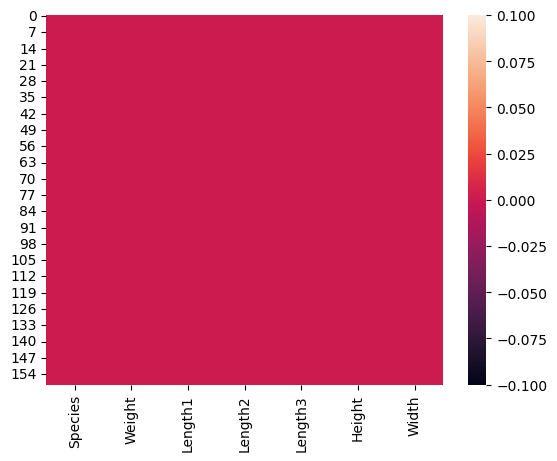

In [47]:
#cek missing data
sns.heatmap(df.isnull())

<ipython-input-48-02f91266d643>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

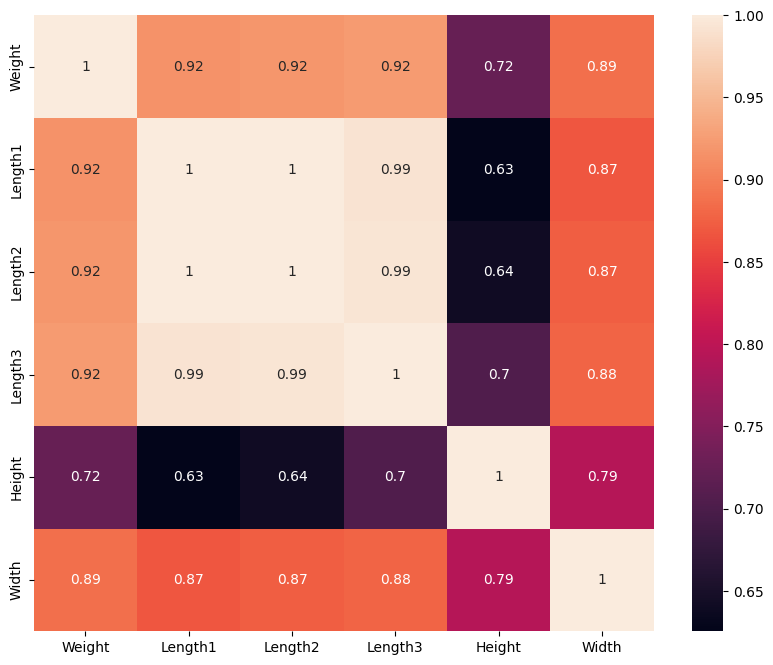

In [48]:
#korelasi data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# DATA PREPARATION

Jumlah Ikan Bersadarkan Species

In [50]:
Specieses = df.groupby('Species').count()[['Width']].reset_index()
Specieses = Specieses.rename(columns={'Width':'Number Of Fishes'})

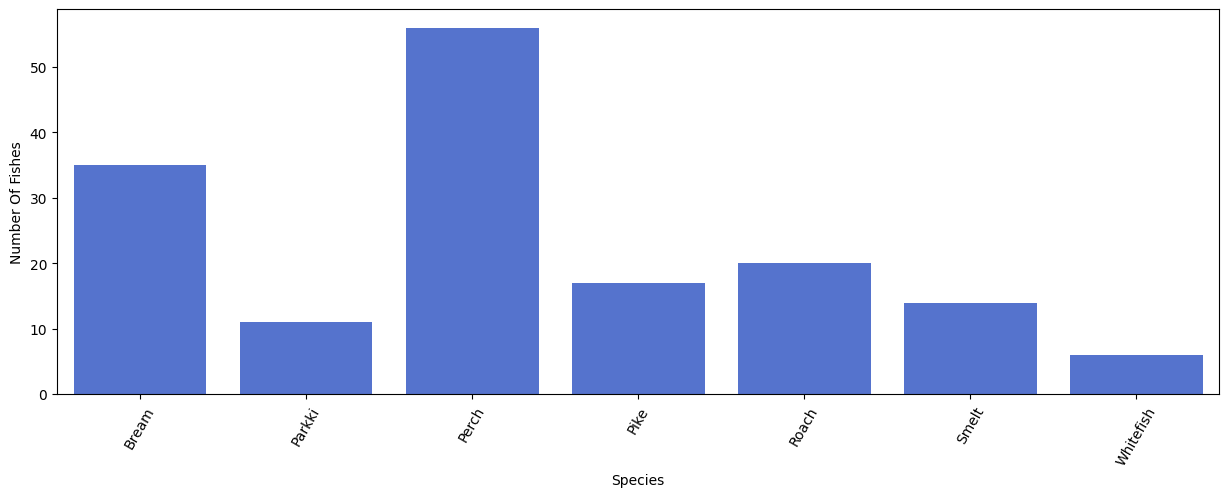

In [60]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Specieses['Species'], y=Specieses['Number Of Fishes'], color='royalblue')
plt.xticks(rotation=60)
plt.show()

In [54]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Distribusi Length1

<ipython-input-65-b90f54241e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length1'])


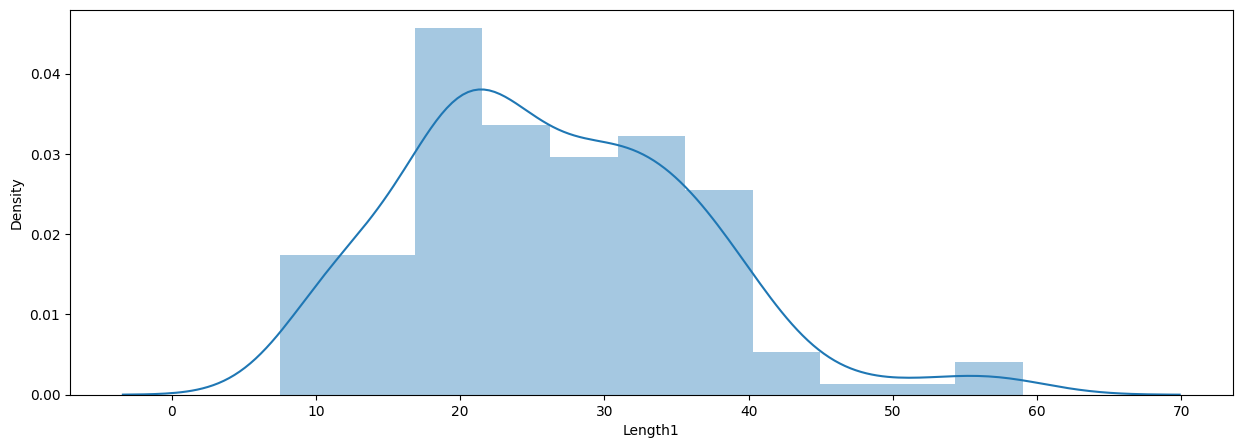

In [65]:
plt.figure(figsize=(15, 5))
sns.distplot(df['Length1'])
plt.show()

Distribusi Length2

<ipython-input-66-7fb2b0e2facf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length2'])


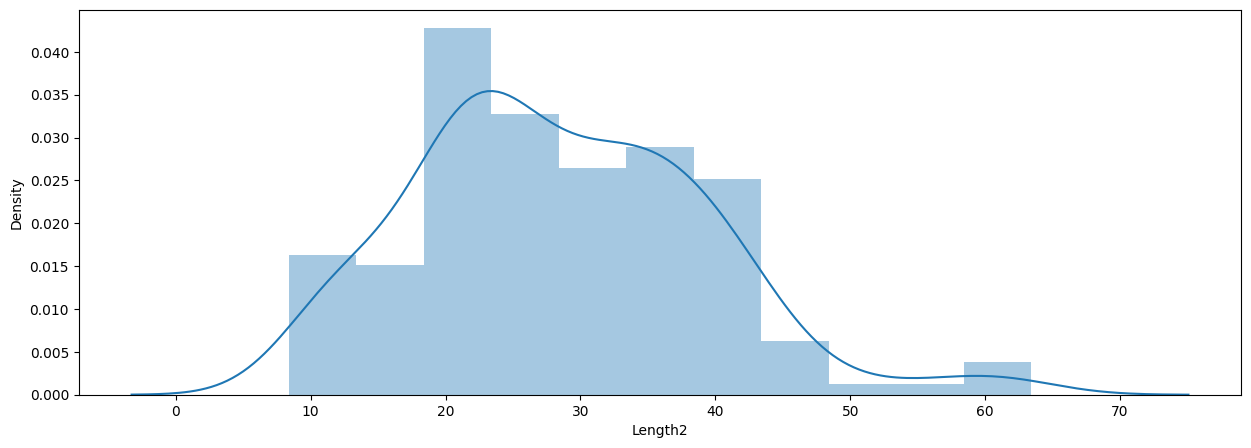

In [66]:
plt.figure(figsize=(15,5))
sns.distplot(df['Length2'])
plt.show()

Distribusi Length3

<ipython-input-67-0ac0e8111e47>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length3'])


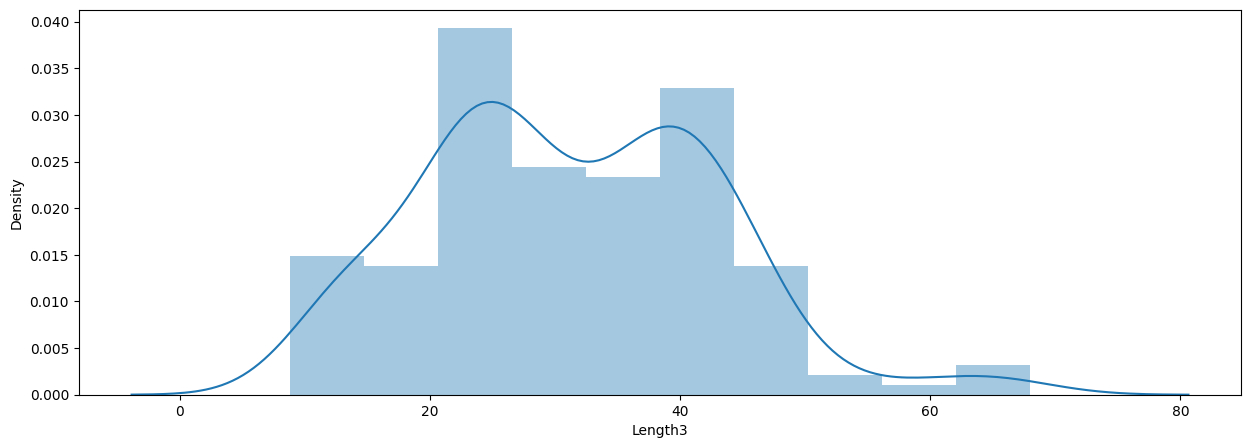

In [67]:
plt.figure(figsize=(15,5))
sns.distplot(df['Length3'])
plt.show()

Distribusi Height

<ipython-input-68-f9d93015ae1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


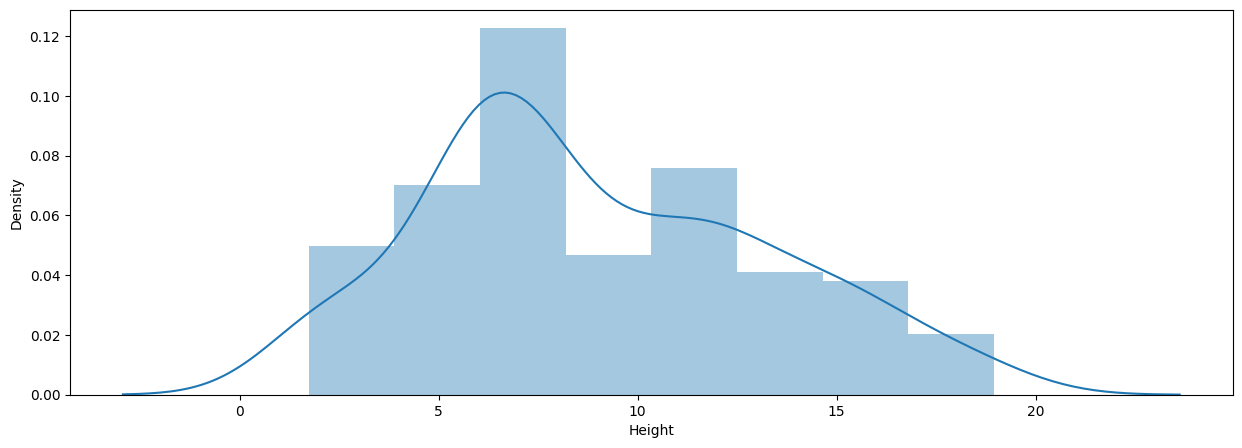

In [68]:
plt.figure(figsize=(15,5))
sns.distplot(df['Height'])
plt.show()

Distribusi Width

<ipython-input-69-578c0a71da1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Width'])


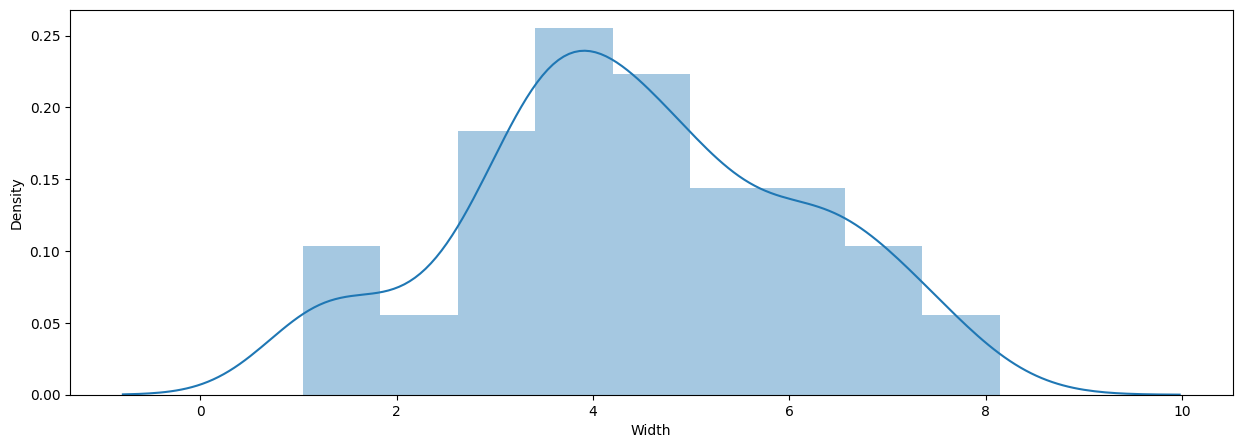

In [69]:
plt.figure(figsize=(15,5))
sns.distplot(df['Width'])
plt.show()

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Terapkan LabelEncoder pada kolom 'smoker' dan simpan dalam kolom baru 'smoker2'
df['Species2'] = label_encoder.fit_transform(df['Species'])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species2
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length1   159 non-null    float64
 3   Length2   159 non-null    float64
 4   Length3   159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
 7   Species2  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


# MODELLING

In [84]:
#seleksi fitur
features = df.drop(['Weight','Species'], axis=1)
x = features
y = df['Weight']
x.shape, y.shape

((159, 6), (159,))

In [85]:
#SPLIT DATA TRAINING DAN DATA TESTING
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(40,)

In [86]:
#MEMBUAT MODEL REGRESI LINIER
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [87]:
#TESTING AKURASI MODEL
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  85.17549396067714 %


# EVALUATION

In [88]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species2
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [89]:
#Length1,Length2,Length3,Height,Width
input_data = np.array([[23.2,25.4,30.0,11.5200,4.0200,0]])

prediction = lr.predict(input_data)
print('Estimasi Berat Ikan :', prediction)

Estimasi Berat Ikan : [282.66554208]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# SAVE MODEL

In [90]:
import pickle

filename = 'estimasi_ikan.sav'
pickle.dump(lr,open(filename,'wb'))